# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Data Reading And Analysing the Dataset

In [2]:
pd.set_option('display.max_columns', None)
df=pd.read_excel(r"C:\Users\Avinash\Desktop\Projects\EvaluationProjects\8_flightPrice\Data_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
dfr=pd.DataFrame(df["Price"])

In [4]:
df.shape

(10683, 11)

In [5]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

As There are not much null blocks so we will drop those rows

In [7]:
df.dropna(inplace=True)

Removed All the Null Valued rows

----------------------------------------------------------------------------

In [8]:
catagory=[]
catagory=df.select_dtypes(include="object").columns

In [9]:
for i in catagory:
    print(i,df[i].unique())
    print("**********************************************************************")

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
**********************************************************************
Date_of_Journey ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
**********************************************************************
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
******************

In [10]:
df.drop(df.index[6474],inplace=True)

In [11]:
duration=[]
for i in df.Duration:
    duration.append(i.split("h"))


In [12]:
hour=[]
for i in duration:
    hour.append(i[0])

In [13]:
minuites=[]
try:
    for i in duration:
        if len(i[1])==0:
            minuites.append("1")
        else:
            minuites.append(i[1])
except:
    print(duration.index(i))

In [14]:
dur=[]
for i in range(len(duration)):
    h=int(hour[i])
    m=int(minuites[i].strip("m"))
    dur.append((h*60)+m)

In [15]:
df["Duration(Minuites)"]=dur

In [16]:
df.drop(columns={"Duration"},inplace=True)

In [17]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Duration(Minuites)
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,1141
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,285


-------------------------------------------------------------------------------------------------------------------

In [18]:
df["Total_Stops"].replace('non-stop','0',inplace=True)

In [19]:
df.Total_Stops=df.Total_Stops.str.split(' ')
df.Total_Stops=df.Total_Stops.str[0]

---------------------------------------------------------------

In [20]:
df.Additional_Info.replace("No info","No Info",inplace=True)

---------------------------------------------------------------------------------------------

In [21]:
day=[]
month=[]
for i in df.Date_of_Journey:
         day.append((i.split("/")[0]).lstrip('0'))
         month.append(i.split("/")[1].lstrip('0'))

In [22]:
df["Day_of_Journey"]=day
df["Month_of_Journey"]=month

In [23]:
df.drop(columns={"Date_of_Journey"},inplace=True)

-----------------------------------------------------------------------------------------------------------------------

# EDA

## Analysing The MAXIMUMS And MINIMUMS

In [24]:
df.describe()

,Price,Duration(Minuites)
count,10681.000000,10681.000000
mean,9086.443123,643.176762
std,4611.075357,507.824436
min,1759.000000,75.000000
25%,5277.000000,170.000000
50%,8372.000000,520.000000
75%,12373.000000,930.000000
max,79512.000000,2860.000000


## Finding Any Highly Correlated values

In [25]:
corr_matrix = df.corr().abs()# Create correlation matrix

In [26]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))# Select upper triangle of correlation matrix

In [27]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]# Find features with correlation greater than 0.95

In [28]:
to_drop

[]

Nothing To drop

## Catplot for Airline

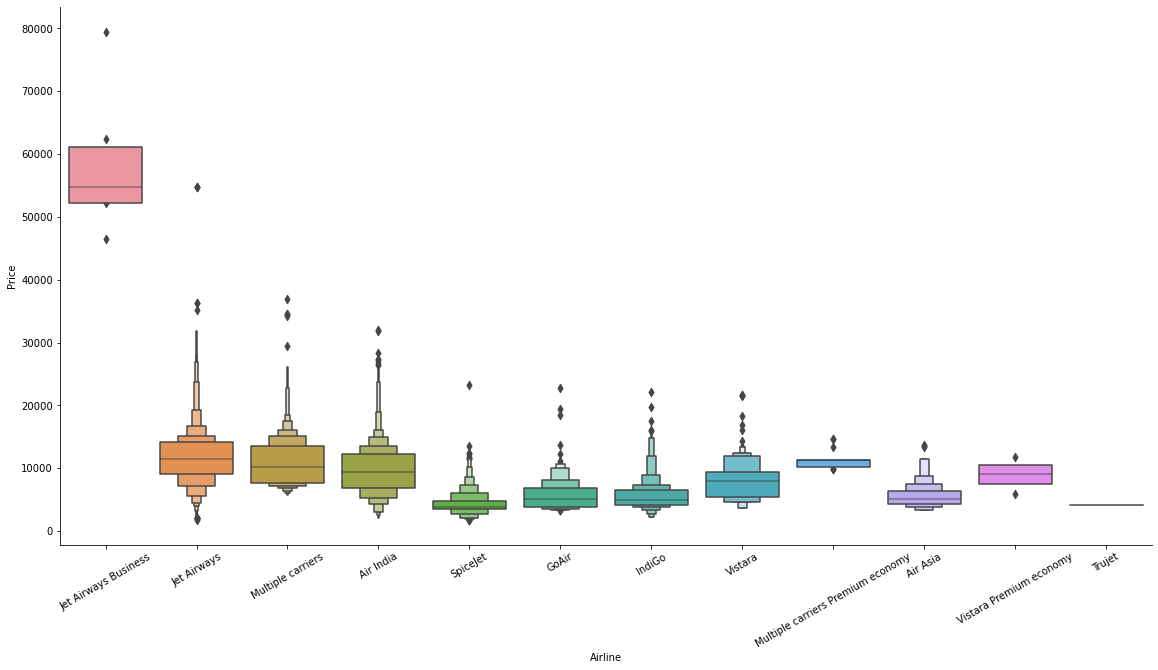

In [29]:
a=sn.catplot(y="Price",x="Airline",data=df.sort_values("Price",ascending=False),kind="boxen", height = 8, aspect = 2)
a.set_xticklabels(rotation=30)

We can see that JEt Airways Buisness is the most expensive and the others are nearly the same

## One Hot Encoding Our Airlines Data

In [30]:
Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


## Catplot For Source

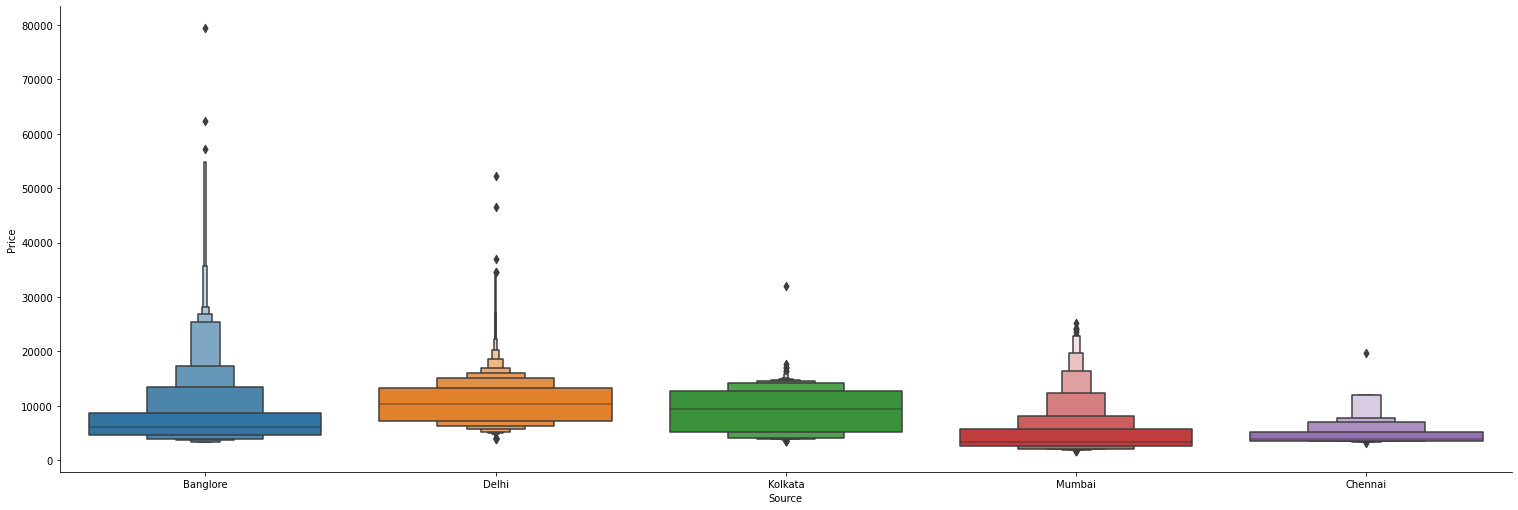

In [31]:
df["Source"].value_counts()
sn.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 7, aspect = 3)
plt.show()

## One Hot Encoding Our SourceColumn

In [32]:
Source = df[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


## One Hot Encoding For Destination

In [33]:
Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


## Dropping The  Airline, Source, Destination

In [ ]:
dftrain.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [ ]:
dftrain.head()

## Extracting hour and minute of Arrival time and Departure time

In [ ]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [ ]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [ ]:
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

## Merging

In [ ]:
dftrain = pd.concat([dftrain, Airline, Source, Destination], axis = 1)

In [ ]:
dftrain.head()

## Distplot

In [ ]:
final.Duration(Minutes)

In [ ]:
for c in colmn:
    colmn[c]=pd.to_numeric(colmn[c], errors='ignore')
    plt.figure(figsize=(8,4))
    sn.distplot(colmn[c])

## Boxplot

In [ ]:
colmn=dftrain[['Total_Stops','Price','Duration(Minuites)','Day_of_Journey','Month_of_Journey','Arrival_hour','Arrival_min','Dep_hour','Dep_min']]

In [ ]:
for c in colmn:
    colmn[c]=pd.to_numeric(colmn[c], errors='ignore')
    plt.figure(figsize=(8,4))
    sn.boxplot(x=c,data=colmn)

Some columns have a high amount of outliers in them

## Pairplot

In [ ]:
sn.pairplot(colmn)

## Pairplot With Our Target Variable

In [ ]:
sn.pairplot(data=df,
            x_vars=['Price'],
            y_vars=df.columns)

## Heatmap

In [ ]:
plt.figure(figsize=(14,10))
sn.heatmap(colmn.corr(),linewidths=.1,cmap="coolwarm", annot=True)

Some Of the columns have some correlation but not that high so we leave it at that.                                             
Total_Stops Have high correlation with our Target Variable.

# Dropping

We Will Drop Additional Information Because More Than 80% of the data is "No Info".We will also Drop Route.

# Removing Outliers

In [ ]:
from scipy.stats import zscore

In [ ]:
z=np.abs(zscore(colmn))
colmn=colmn[(z<3).all(axis=1)]

In [ ]:
colmn.shape

1.83% data is lost which is ok

# Skewness Removal

In [ ]:
colmn.skew()

In [ ]:
from scipy.stats import boxcox

### Duration(Minuites)

In [ ]:
d=boxcox(colmn["Duration(Minuites)"])[0]
pd.Series(d).skew()

In [ ]:
colmn["Duration(Minuites)"]=d

# Merging One last time

In [ ]:
final= pd.concat([colmn, Airline, Source, Destination,], axis = 1)

In [ ]:
final.isna().sum()

In [ ]:
final.dropna(inplace=True)

# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
final=pd.DataFrame(scaler.fit_transform(df),columns=final.columns)

# Input Splitting

In [ ]:
x=final.drop(["Price"],axis=1)

In [ ]:
y=final["Price"]

# Finding The Best Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
#regress function
from sklearn.model_selection import cross_val_score,train_test_split
def regress(model,x,y):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.75,random_state=7)
    #train the model
    model.fit(X_train,Y_train)
    ac=model.score(X_test,Y_test)*100
    print("R2:",ac)
    
    #cross validation
    score=cross_val_score(model,x,y,cv=5)
    cv=np.mean(score)*100
    print("CV Score:",cv)
    
    #diffrence between them
    print("Diffrence:",abs(ac-cv))

In [ ]:
LR=LinearRegression()
regress(LR,x,y)

In [ ]:
DTR = DecisionTreeRegressor()
regress(DTR,x,y)

In [ ]:
RDG=Ridge()
regress(RDG,x,y)

In [ ]:
LSO=Lasso()
regress(LSO,x,y)

In [ ]:
RFR=RandomForestRegressor()
regress(RFR,x,y)

In [ ]:
KNR=KNeighborsRegressor()
regress(KNR,x,y)

In [ ]:
XGB=XGBRegressor()
regress(XGB,x,y)

XGBRegressor is our best model

# Hyper Parameter Tuning

In [ ]:
XGB.get_params()

In [ ]:
params = {  'max_depth':[2,4,6],
    'min_child_weight': [1,2,3],
    'eta':[.1,.2,.3],
    'subsample': [1,2,3],
    'colsample_bytree': [1,2,3],
    'objective':['reg:squarederror','binary:logistic','multi:softmax']}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gs = GridSearchCV(XGB, params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.75,random_state=7)
gs.fit(X_train, Y_train)

In [ ]:
gs.best_params_

# Checking Accuracy Score

In [ ]:
XGB=XGBRegressor(colsample_bytree= 1,
 eta= 0.1,
 max_depth= 6,
 min_child_weight= 3,
 objective= 'reg:squarederror',
 subsample= 1)

In [ ]:
XGB.fit(X_train,Y_train)

In [ ]:
XGB.score(X_test,Y_test)

In [ ]:
y_test_pred=XGB.predict(X_test)

In [ ]:
print(XGB.score(X_test, y_test_pred))

# Finally Saving our model

In [ ]:
import joblib
joblib.dump(XGB,r"C:\Users\Avinash\Desktop\Projects\EvaluationProjects\8_flightPrice\price.pkl")